In [1]:
import numpy as np                                                             
import os
import sys
import matplotlib.pyplot as plt

In [22]:
baseline_path = "/checkpoint/antares/experiments/fl_new_master/slimIPL/ls_100h_baseline_s2s_wp_st4_final_32gpu_final_dbg/"

def load_baseline():
    logs = {}
    for log_file in ['001_log', '002_log', '003_log']:
        with open(baseline_path + log_file) as f:
            for line in f:
                parts = line.split('|')
                
                nupdates = -1
                ks = []
                vs = []
                for part in parts:
                    sp = part.strip().split(':')
                    k = sp[0]
                    v = ''.join(sp[1:]).strip()
                    if k == 'nupdates':
                        nupdates = int(v)
                    else:
                        ks.append(k)
                        vs.append(v)
                        
                logs[nupdates] = {}   
                for i in range(len(ks)):
                    logs[nupdates][ks[i]] = vs[i]
                
    return logs
                


def load_joint(path):
    logs = {}
    with open(path + "/log") as f:
        for line in f:
            parts = line.split('|')
                
            nupdates = -1
            ks = []
            vs = []
            for part in parts:
                sp = part.strip().split(':')
                k = sp[0]
                v = ''.join(sp[1:]).strip()
                if k == 'nupdates':
                    nupdates = int(v)
                else:
                    ks.append(k)
                    vs.append(v)
                        
            logs[nupdates] = {}   
            for i in range(len(ks)):
                logs[nupdates][ks[i]] = vs[i]
                
    return logs
    
    

In [20]:
logs = load_baseline()
print(logs[3000])

{'epoch': '17', 'lr': '0.001125', 'lrcriterion': '0.001125', 'runtime': '014339', 'bch(ms)': '2073.02', 'smp(ms)': '1.47', 'fwd(ms)': '172.28', 'crit-fwd(ms)': '8.59', 'bwd(ms)': '1792.71', 'optim(ms)': '45.74', 'loss': '286.35001', 'train-TER': '161.90', 'train-WER': '258.46', '/private/home/qiantong/push_numbers/lists/dev-clean.lst-loss': '142.55777', '/private/home/qiantong/push_numbers/lists/dev-clean.lst-TER': '322.51', '/private/home/qiantong/push_numbers/lists/dev-clean.lst-WER': '479.62', '/private/home/qiantong/push_numbers/lists/dev-other.lst-loss': '125.45238', '/private/home/qiantong/push_numbers/lists/dev-other.lst-TER': '364.24', '/private/home/qiantong/push_numbers/lists/dev-other.lst-WER': '528.15', '/private/home/qiantong/push_numbers/lists/test-clean.lst-loss': '143.77398', '/private/home/qiantong/push_numbers/lists/test-clean.lst-TER': '318.54', '/private/home/qiantong/push_numbers/lists/test-clean.lst-WER': '478.26', '/private/home/qiantong/push_numbers/lists/test-o

In [24]:
logs = load_joint('/checkpoint/qiantong/wav2letter_experiments/joint_asr_lm/100h_s2s_wp_lmstart0/')
print(logs[3000])

{'timestamp': '2021-03-03 154317', 'asr-epoch': '17', 'lm-epoch': '1', 'lr': '0.001125', 'lrcriterion': '0.001125', 'runtime': '002136', 'asr-bch(ms)': '1212.76', 'lm-bch(ms)': '84.21', 'smp(ms)': '0.07', 'fwd(ms)': '128.72', 'crit-fwd(ms)': '36.07', 'bwd(ms)': '1090.04', 'optim(ms)': '46.11', 'loss': '1176.80865', 'train-TER': '89.41', 'train-WER': '127.43', 'dev-other.lst-loss': '0.00000', 'dev-other.lst-TER': '0.00', 'dev-other.lst-WER': '0.00', 'dev-clean.lst-loss': '0.00000', 'dev-clean.lst-TER': '0.00', 'dev-clean.lst-WER': '0.00', 'avg-isz': '12679', 'avg-tsz': '042', 'max-tsz': '086', 'hrs': '28070.62', 'thrpt(sec/sec)': '16728.49', 'lm-train-loss': '6.12', 'lm-train-ppl': '456.21', 'lm-wp_dev.txt-loss': '5.70', 'lm-wp_dev.txt-ppl': '299.28', 'lm-throughput': '778263.50'}


In [45]:
def plot(logs):
    fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(15,15))

    for name, value in logs.items():
        log = value[0]
        job_color = value[1]

        x = []
        train_loss = []
        lr = []
        dev_wer = []

        for k, v in log.items():
            x.append(k)
            lr.append(float(v['lr']))
            train_loss.append(float(v['loss']))
            if 'baseline' in name:
                dev_wer.append(float(v['/private/home/qiantong/push_numbers/lists/dev-other.lst-WER']))
            else:
                dev_wer.append(float(v['dev-other.lst-WER']))
                
            
        ax1.plot(x, lr, job_color, label=name)
        ax2.plot(x, train_loss, job_color, label=name)
        ax3.plot(x, dev_wer, job_color, label=name)
        
    
    ax1.legend()   
    ax1.set_xlabel('updates')
    ax1.set_ylabel('lr')

    ax2.legend()
    ax2.set_xlabel('updates')
    ax2.set_ylabel('train loss')
    ax2.set_ylim(10,150)

    ax3.legend()
    ax3.set_xlabel('updates')
    ax3.set_ylabel('dev wer')
    ax3.set_ylim(10,80)

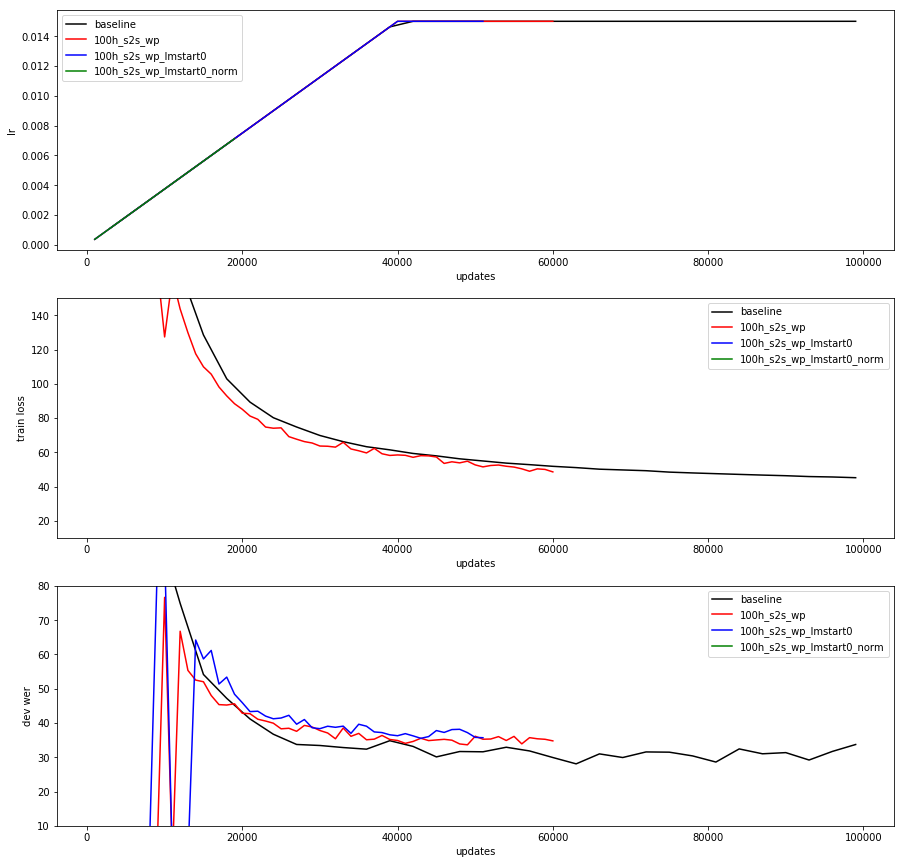

In [53]:
logs = {
    "baseline": (load_baseline(), 'k'),
    "100h_s2s_wp": (load_joint('/checkpoint/qiantong/wav2letter_experiments/joint_asr_lm/100h_s2s_wp_copy/'), 'r'),
    "100h_s2s_wp_lmstart0": (load_joint('/checkpoint/qiantong/wav2letter_experiments/joint_asr_lm/100h_s2s_wp_lmstart0/'), 'b'),
    "100h_s2s_wp_lmstart0_norm": (load_joint('/checkpoint/qiantong/wav2letter_experiments/joint_asr_lm/100h_s2s_wp_lmstart0_norm/'), 'g'),
}
plot(logs)